In [3]:
import numpy as np
from Pilsung import*

In [4]:
def generateSbox(k1):
    """
    Generates a key-dependent S-box for cryptographic operations
    Args:
        k1 (int): 8-bit key value (0-255) used for S-box generation
    Returns:
        numpy.ndarray: Generated S-box permutation table
    """
    # Initialize 32-element key array (only position 16 used in this implementation)
    key_total = np.zeros([32], dtype=np.int32)
    key_total[16] = k1  # Set specific key position
    
    # Generate encryption permutation using key and global parameters
    gen_enc_perm(key_total, current_permutation_8, pboxes)
    
    # Convert global sboxes variable to numpy array
    sbox1 = np.array(sboxes)
    return sbox1

def cal_diff(sbox1, sbox2):
    """
    Calculates the number of identical entries between two S-boxes
    (Measures S-box similarity for differential analysis)
    
    Args:
        sbox1 (numpy.ndarray): First S-box to compare
        sbox2 (numpy.ndarray): Second S-box to compare
    Returns:
        int: Number of positions with identical values
    """
    eq_num = 0
    for i in range(256):
        # Compare corresponding entries in both S-boxes
        if (sbox1[0][0][i] - sbox2[0][0][i] == 0):
            print(i)  # Debug print for matching positions
            eq_num += 1
    return eq_num

In [38]:
# Initialize matrices for S-box analysis
Sbox_V = np.zeros([256, 256])  # Stores S-box(v) values for each (v, rk1) pair
Sbox_gen = np.zeros([256])      # Temporary storage for generated S-box
diffnum = np.zeros([256, 256])  # Reserved for differential analysis (unused in current implementation)
v_unique_num = np.zeros([256])  # Counts unique S-box outputs per input value v

# Generate S-box variations for different keys
for k1 in range(256):
    # Generate S-box using current key (rk1=k1)
    # Note: Implementation of generateSbox() should return 256-element array
    Sbox_gen = np.array(generateSbox(k1))
    
    # Store S-box outputs for all inputs v with current key
    for v in range(256):
        Sbox_V[v][k1] = Sbox_gen[v]  # Record S-box output for (v, k1) pair

# Calculate uniqueness metrics
for v in range(256):
    # Count distinct output values across all keys for input v
    v_unique_num[v] = len(np.unique(Sbox_V[v]))

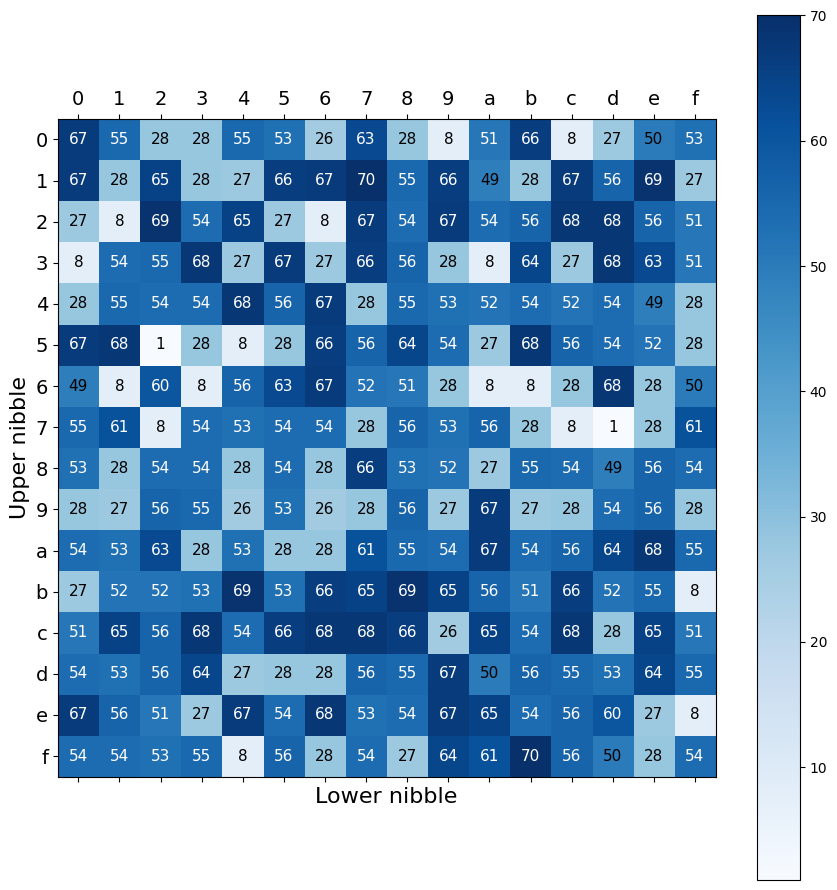

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the 256-element array into 16x16 matrix representing nibble combinations
v_unique_num = v_unique_num.reshape((16, 16))  # Shape into 16x16 grid for hex nibble visualization

# Create figure and axes for confusion matrix plot
fig, ax = plt.subplots(figsize=(9, 9))  # Square figure for balanced matrix display

# Visualize the matrix using color mapping
cax = ax.matshow(v_unique_num, cmap='Blues')  # Use blue gradient colormap for value intensity

# Add color scale reference
fig.colorbar(cax)  # Show value-color correlation scale

# Annotate cells with numerical values
for i in range(16):
    for j in range(16):
        # Dynamic text color based on cell value
        text_color = 'white' if v_unique_num[i, j] > 50 else 'black'
        ax.text(j, i, str(int(v_unique_num[i, j])), 
                va='center', ha='center', 
                color=text_color, fontsize=11)

# Configure axis labels using hexadecimal notation
ticks = list("0123456789abcdef")  # Hexadecimal digit labels (0-15)
ax.set_xticks(np.arange(16))
ax.set_yticks(np.arange(16))
ax.set_xticklabels(ticks, fontsize=14)  # X-axis: lower nibble
ax.set_yticklabels(ticks, fontsize=14)  # Y-axis: upper nibble

# Add axis descriptions
plt.ylabel("Upper nibble (4 MSBs)", fontsize=16)  # Most significant bits
plt.xlabel("Lower nibble (4 LSBs)", fontsize=16)  # Least significant bits

# Optimize layout and display
plt.tight_layout()  # Adjust padding for clean presentation
plt.show()